<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-effect-of-Marriage-Rating,-Age,-Years-Married,-Number-of-Children,-Religiousness,-and-Education-Level-on-the-Number-of-Affairs." data-toc-modified-id="The-effect-of-Marriage-Rating,-Age,-Years-Married,-Number-of-Children,-Religiousness,-and-Education-Level-on-the-Number-of-Affairs.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The effect of Marriage Rating, Age, Years Married, Number of Children, Religiousness, and Education Level on the Number of Affairs.</a></span><ul class="toc-item"><li><span><a href="#Importing-the-necessary-libraries" data-toc-modified-id="Importing-the-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the necessary libraries</a></span></li><li><span><a href="#Reading-the-datasets" data-toc-modified-id="Reading-the-datasets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading the datasets</a></span></li><li><span><a href="#Data-preprocessing-and-EDA" data-toc-modified-id="Data-preprocessing-and-EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data preprocessing and EDA</a></span><ul class="toc-item"><li><span><a href="#checking-for-null-and-infinite-numbers" data-toc-modified-id="checking-for-null-and-infinite-numbers-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>checking for null and infinite numbers</a></span></li><li><span><a href="#Handling-outliers" data-toc-modified-id="Handling-outliers-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Handling outliers</a></span></li><li><span><a href="#Distribution-of-the-variables" data-toc-modified-id="Distribution-of-the-variables-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Distribution of the variables</a></span></li><li><span><a href="#Correlation-between-variables" data-toc-modified-id="Correlation-between-variables-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Correlation between variables</a></span></li></ul></li><li><span><a href="#Model-bulding" data-toc-modified-id="Model-bulding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model bulding</a></span></li></ul></li></ul></div>

This code fits a multinomial logit model to study the effect of various independent variables (e.g. marriage rating, age, years married, number of children, religiousness, and education level) the number of affairs a person has. The summary function will print a summary of the model including the coefficients, p-values, and other statistics.

# The effect of Marriage Rating, Age, Years Married, Number of Children, Religiousness, and Education Level on the Number of Affairs.

## Importing the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 

# statsmodels 
import statsmodels.api as sm

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Some EDA functions
import sys

from Functions_EDA import *
from functions_plot_EDA import *

## Reading the datasets

In [3]:
# Dataset from statsmodel
data = sm.datasets.fair.load_pandas().data

In [4]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


## Data preprocessing and EDA

### checking for null and infinite numbers

In [6]:
percentage_nullValues(data) #Null values?

,Percentage_NaN
rate_marriage,0.0
age,0.0
yrs_married,0.0
children,0.0
religious,0.0
educ,0.0
occupation,0.0
occupation_husb,0.0
affairs,0.0


In [7]:
np.isinf(data).any() #Infinite numbers?

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
dtype: bool

In [8]:
#Converting the variables
data['affairs'] = data['affairs'].astype(int)
data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']] = data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']].astype(int)


### Handling outliers

In [56]:
for item in range(0, len(data.columns)):
    OutLiersBox(data, data.columns[item])

### Distribution of the variables

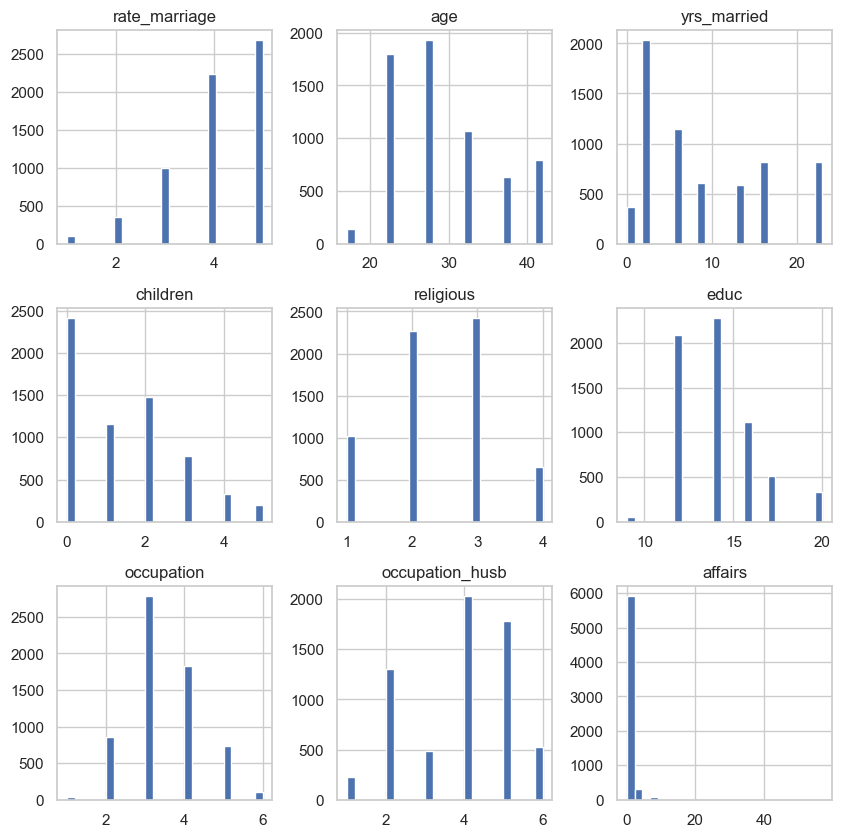

In [93]:
data.hist(bins=25,figsize=(10,10))
plt.show()

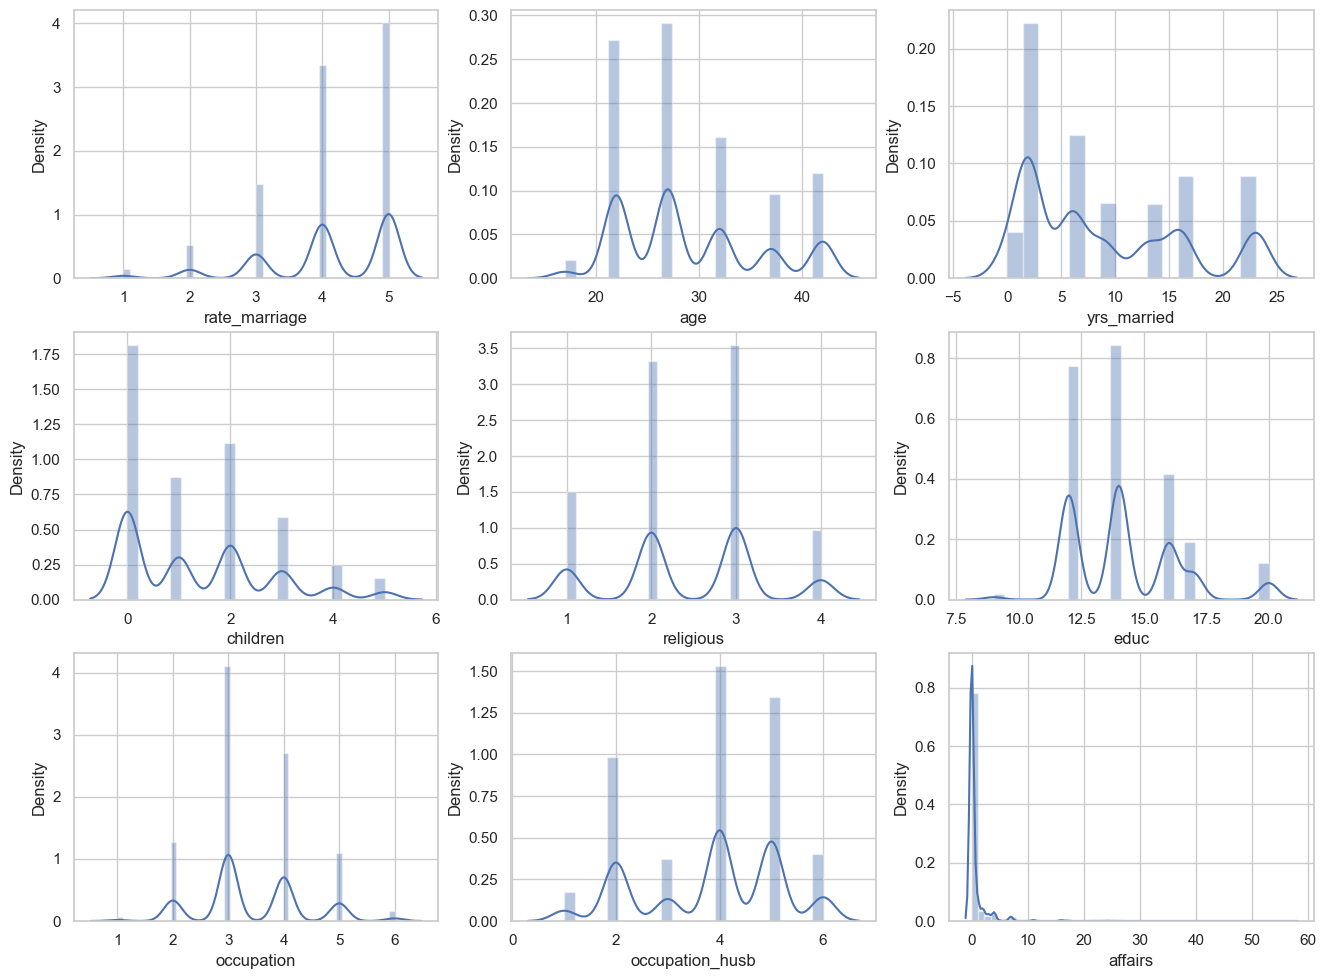

In [94]:
import math

data_columns = data._get_numeric_data().columns.values
plot_columns = 3
number_of_columns = math.ceil(len(data_columns) / plot_columns)
number_of_rows = math.ceil((len(data_columns)) / number_of_columns)
plt.figure(figsize=(16, 16))
# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i + 1)
    sns.distplot(data[data_columns[i]], kde=True)

Text(0.5, 1.0, 'Distribution of number of affairs')

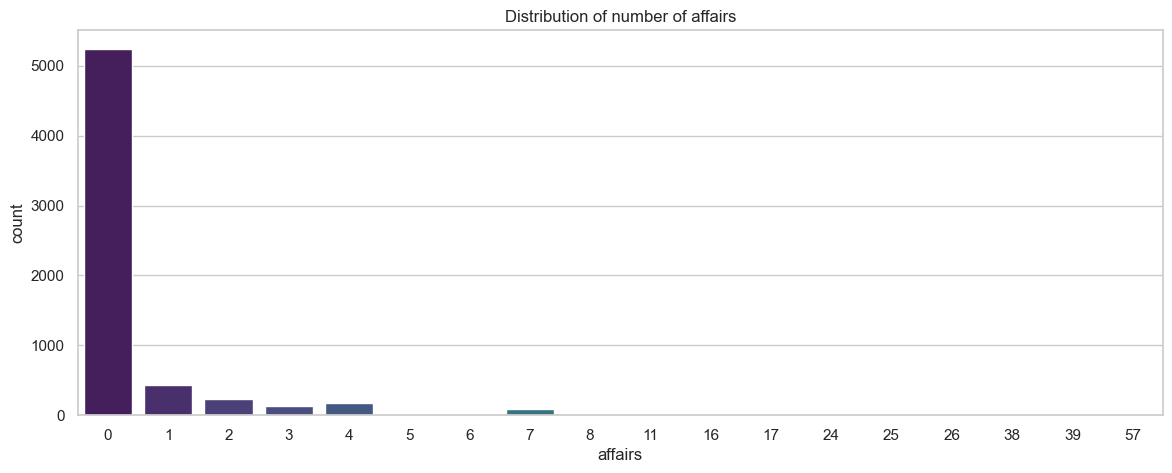

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
ax = sns.countplot(x="affairs", data=data, palette="viridis")
plt.title("Distribution of number of affairs")

In [9]:
data = data[data['affairs'] <= 4]
data['affairs'].max() ##better to limit our range of Affairs... more significative

4

In [10]:
data.skew()

rate_marriage     -1.035970
age                0.542958
yrs_married        0.674461
children           0.727941
religious         -0.036577
educ               0.792379
occupation         0.338683
occupation_husb   -0.384804
affairs            3.006987
dtype: float64

### Correlation between variables

Text(0.5, 1.0, 'Correlation Heatmap')

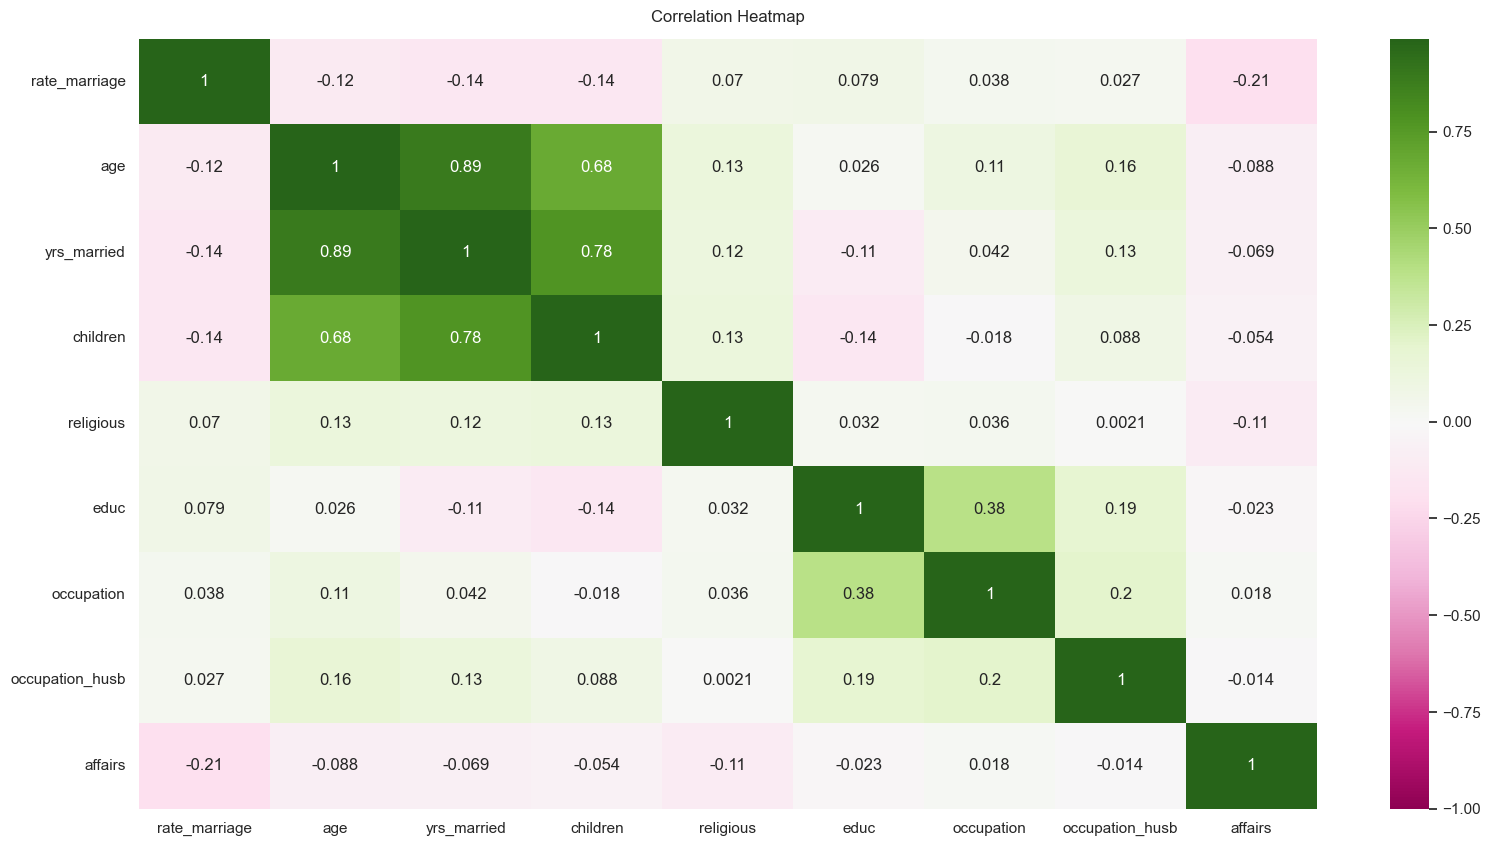

In [99]:
plt.figure(figsize=(19, 10))
heatmap = sns.heatmap(data.corr(),
                      vmin=-1,
                      vmax=0.99,
                      annot=True,
                      cmap='PiYG')
heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize': 12},
                  pad=12)

## Model bulding

In [11]:
# seleccionamos las variables independientes y dependiente
X = data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']]
y = data['affairs']

In [12]:
# creamos un modelo de regresión logística multinomial
multinom = sm.MNLogit(y, X)

In [13]:
# ajustamos el modelo
multinom_fit = multinom.fit()

Optimization terminated successfully.
         Current function value: 0.588170
         Iterations 8


In [16]:
# imprimimos los resultados
results_summary = multinom_fit.summary()
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                affairs   No. Observations:                 6217
Model:                        MNLogit   Df Residuals:                     6193
Method:                           MLE   Df Model:                           20
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                 0.07089
Time:                        18:53:26   Log-Likelihood:                -3656.7
converged:                       True   LL-Null:                       -3935.7
Covariance Type:            nonrobust   LLR p-value:                1.967e-105
=================================================================================
    affairs=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.4852      0.045    -10.825      0.000      -0.573      -0.397
age               0.0026      0.014      0.183      0.855      -0.025       0.030
yrs_married       0.0289      0.016      1.756      0.079      -0.003       0.061
children          0.0001      0.055      0.002      0.998      -0.108       0.109
religious        -0.3639      0.060     -6.109      0.000      -0.481      -0.247
educ             -0.0077      0.022     -0.356      0.722      -0.050       0.034
---------------------------------------------------------------------------------
    affairs=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.5417      0.058     -9.330      0.000      -0.655      -0.428
age              -0.0392      0.019     -2.053      0.040      -0.077      -0.002
yrs_married       0.0236      0.022      1.073      0.283      -0.020       0.067
children          0.1276      0.073      1.736      0.083      -0.016       0.272
religious        -0.2261      0.077     -2.920      0.003      -0.378      -0.074
educ              0.0221      0.029      0.771      0.440      -0.034       0.078
---------------------------------------------------------------------------------
    affairs=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.6047      0.080     -7.528      0.000      -0.762      -0.447
age              -0.1124      0.027     -4.122      0.000      -0.166      -0.059
yrs_married       0.0243      0.032      0.755      0.450      -0.039       0.087
children          0.0873      0.114      0.768      0.443      -0.136       0.310
religious        -0.2757      0.104     -2.651      0.008      -0.480      -0.072
educ              0.1482      0.039      3.814      0.000       0.072       0.224
---------------------------------------------------------------------------------
    affairs=4       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.7129      0.071    -10.060      0.000      -0.852      -0.574
age               0.0137      0.022      0.619      0.536      -0.030       0.057
yrs_married      -0.1210      0.031     -3.949      0.000      -0.181      -0.061
children         -0.2126      0.116     -1.828      0.068      -0.441       0.015
religious        -0.2835      0.092     -3.082      0.002      -0.464      -0.103
educ              0.0425      0.034      1.235      0.217      -0.025       0.110
=================================================================================
"""

In [17]:
# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,z,P>|z|,[0.025,0.975]
affairs=1,,,,,,
rate_marriage,-0.4852,0.045,-10.825,0.000,-0.573,-0.397
age,0.0026,0.014,0.183,0.855,-0.025,0.030
yrs_married,0.0289,0.016,1.756,0.079,-0.003,0.061
children,0.0001,0.055,0.002,0.998,-0.108,0.109
religious,-0.3639,0.060,-6.109,0.000,-0.481,-0.247
educ,-0.0077,0.022,-0.356,0.722,-0.050,0.034
affairs=2,coef,std err,z,P>|z|,[0.025,0.975]
rate_marriage,-0.5417,0.058,-9.330,0.000,-0.655,-0.428
age,-0.0392,0.019,-2.053,0.040,-0.077,-0.002
